In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
data = pd.read_csv('iris.csv')
data

,sepallength,sepalwidth,petallength,petalwidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Split data
x, y = data.iloc[:, :-1], data['target']

In [4]:
x

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [7]:
# Train model
model = SVC()
model.fit(x_train, y_train)
# Evaluate model
y_pred = model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [8]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [9]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [10]:
# Hyperparameter tuning
c= [0.1, 1, 10, 100, 1000]
for v in c:
  model=SVC(C=v)
  model.fit(x_train, y_train)
  print(f"C={v}, Accuracy:", accuracy_score(y_test, model.predict(x_test)))

C=0.1, Accuracy: 0.8666666666666667
C=1, Accuracy: 0.9666666666666667
C=10, Accuracy: 0.9666666666666667
C=100, Accuracy: 1.0
C=1000, Accuracy: 0.9666666666666667


In [11]:
gamma = [0.01, 0.1, 1, 10, 100]
for v in gamma:
  model=SVC(gamma=v)
  model.fit(x_train, y_train)
  print(f"gamma={v}, Accuracy:", accuracy_score(y_test, model.predict(x_test)))

gamma=0.01, Accuracy: 0.9333333333333333
gamma=0.1, Accuracy: 0.9666666666666667
gamma=1, Accuracy: 0.9666666666666667
gamma=10, Accuracy: 0.9666666666666667
gamma=100, Accuracy: 0.5333333333333333


In [12]:
kernel = ['linear', 'poly', 'rbf']
for v in kernel:
  model=SVC(kernel=v)
  model.fit(x_train, y_train)
  print(f"kernel={v}, Accuracy:", accuracy_score(y_test, model.predict(x_test)))

kernel=linear, Accuracy: 0.9666666666666667
kernel=poly, Accuracy: 0.9666666666666667
kernel=rbf, Accuracy: 0.9666666666666667


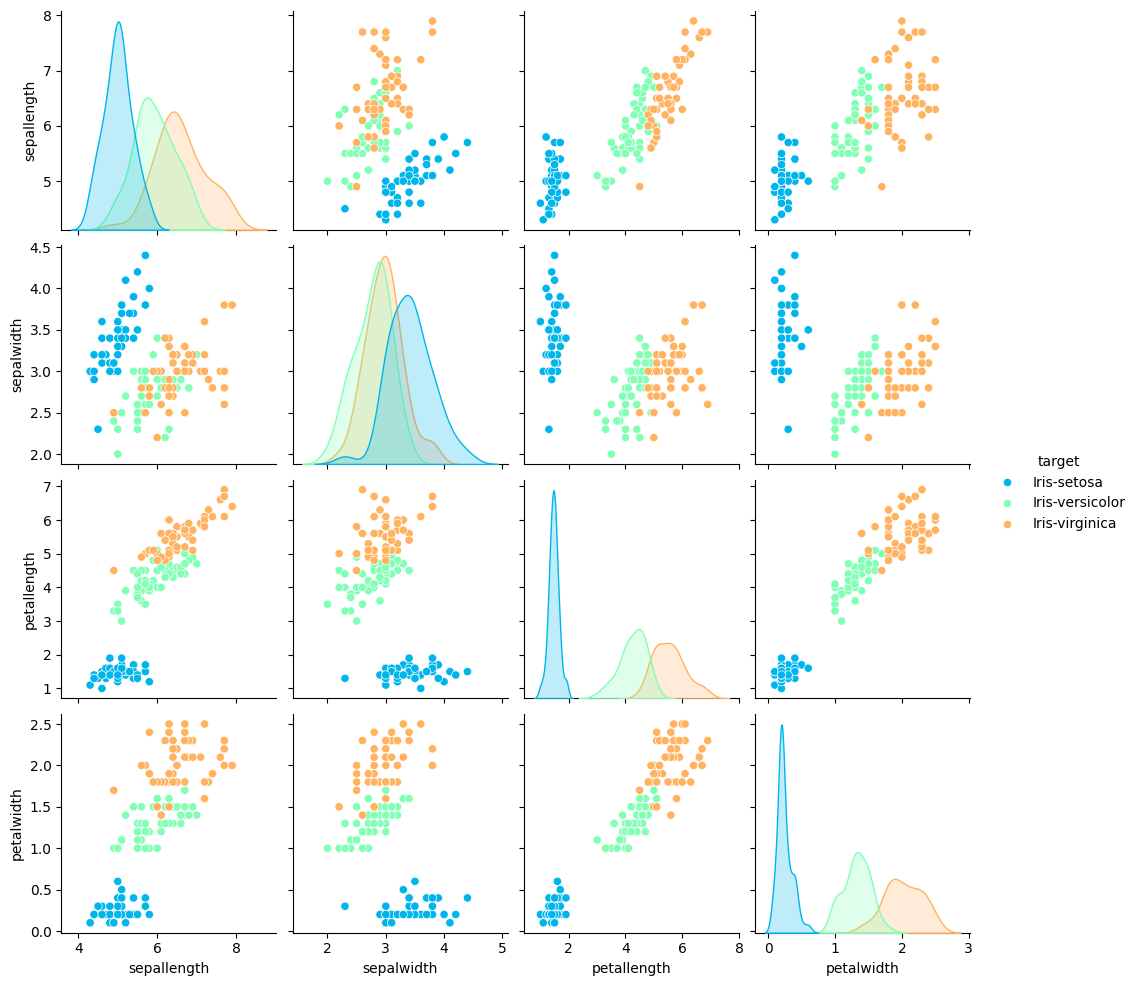

In [13]:
sns.pairplot(data, hue="target", palette="rainbow")
plt.show()